In [25]:
%matplotlib inline

In [26]:
from clawpack.geoclaw import dtopotools
import numpy as np

In [27]:
fault = dtopotools.SiftFault({'acszb2':1.})

In [28]:
lims = fault.containing_rect()

x0 = lims[0]-1.
x1 = lims[1]+1.

y0 = lims[2]-1.
y1 = lims[3]+1.

x = np.linspace(x0,x1,100)
y = np.linspace(y0,y1,100)
fault.subfaults[0].slip = -1.
dtopo0 = fault.create_dtopography(x,y,times=[0.])

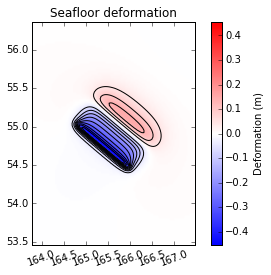

In [29]:
dtopo0.plot_dZ_colors(0.);

In [30]:
subfault0 = fault.subfaults[0]
subfault0.coordinate_specification

'noaa sift'

In [31]:
[subfault0.strike, subfault0.dip, subfault0.rake]

[310.17, 17.0, 90.0]

In [32]:
rect_corners = subfault0.corners

subfault1 = dtopotools.SubFault()
subfault1.slip = 1.
subfault1.coordinate_specification = 'triangular'
subfault1._corners = [rect_corners[0],rect_corners[1],rect_corners[2]]
subfault1.calculate_geometry_triangles()

subfault2 = dtopotools.SubFault()
subfault2.slip = 1.
subfault2.coordinate_specification = 'triangular'
subfault2._corners = [rect_corners[0],rect_corners[2],rect_corners[3]]
subfault2.calculate_geometry_triangles()

In [33]:
subfault1.strike = subfault0.strike
subfault1.dip = subfault0.dip
subfault1.rake = subfault0.rake

subfault2.strike = subfault0.strike
subfault2.dip = subfault0.dip
subfault2.rake = subfault0.rake

In [34]:
subfault1._get_unit_slip_vector()

array([-0.61687172, -0.73074487,  0.2923717 ])

In [35]:
subfault1.corners

[[164.7725657878164, 55.034848649884424, 5000.0],
 [165.25732145800418, 55.363616587449002, 19618.585236136838],
 [166.45827854199581, 54.783183412550997, 19618.585236136838]]

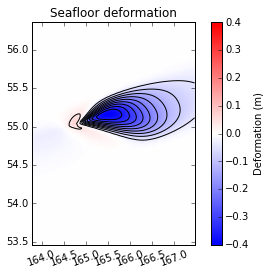

In [36]:
dtopo_tmp = subfault1.okada(x,y)
dtopo_tmp.plot_dZ_colors(0.)

In [37]:
subfault2._get_unit_slip_vector()

array([-0.61687172, -0.73074487,  0.2923717 ])

In [38]:
fault1 = dtopotools.Fault()
fault1.subfaults = []
fault1.subfaults.append(subfault1)
fault1.subfaults.append(subfault2)

In [39]:
dtopo1 = fault1.create_dtopography(x,y,times=[0.])

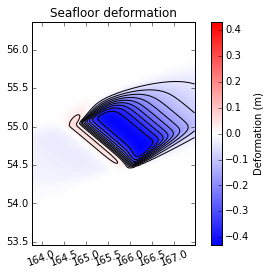

In [40]:
dtopo1.plot_dZ_colors(0.)